# Prétraitement des images 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time

## Import du dataset

In [2]:
path = "./Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
list_photos[0]

1050


'aa68675f50a0551b8dadb954017a50a1.jpg'

In [3]:
# Chargement du dataframe avec l'id du produit et sa catégorie
df = pd.read_csv('cleaned.csv')
df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
# définir une fonction lambda pour extraire la catégorie principale
extract_category = lambda x: x.split(">>")[0].strip().strip(']["')

# appliquer la fonction à la colonne 'product_category_tree' du DataFrame
df["label_name"] = df['product_category_tree'].apply(extract_category)
df["label_name"][0]

'Home Furnishing'

In [5]:
label_encoder = preprocessing.LabelEncoder()
label_encoder .fit(df["label_name"])
df["label"]=label_encoder.transform(df["label_name"])
df["label"][0:3]

0    4
1    0
2    0
Name: label, dtype: int64

In [6]:
df['image_path'] = df.uniq_id + '.jpg'
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,label_name,label,image_path
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,64d5d4a258243731dc7bbb1eef49ad74.jpg


In [7]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'label_name',
       'label', 'image_path'],
      dtype='object')

In [8]:
df_image = df[['uniq_id','label_name','label', 'image_path']].copy()
df_image

,uniq_id,label_name,label,image_path
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,4,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,0,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,0,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,4,d4684dcdc759dd9cdf41504698d737d8.jpg
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,4,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Baby Care,0,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,fd6cbcc22efb6b761bd564c28928483c,Baby Care,0,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,5912e037d12774bb73a2048f35a00009,Baby Care,0,5912e037d12774bb73a2048f35a00009.jpg
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Baby Care,0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


In [9]:
df.groupby("label_name")['uniq_id'].count()

label_name
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64

In [10]:
df.groupby("label")['uniq_id'].count()

label
0    150
1    150
2    150
3    150
4    150
5    150
6    150
Name: uniq_id, dtype: int64

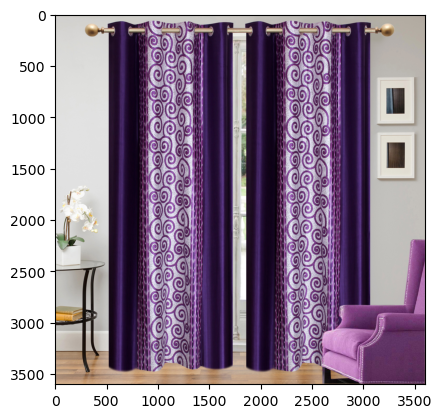

In [11]:
from matplotlib.image import imread
filename = './Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'
image = imread(filename)
plt.imshow(image)
plt.show()

## Affichage d'exemples d'images par label

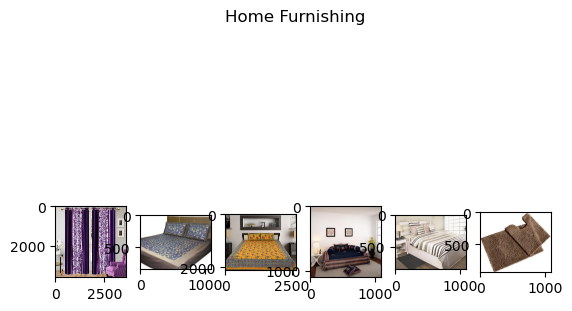

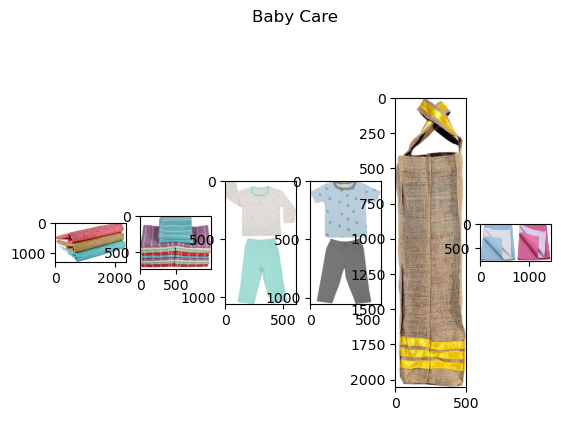

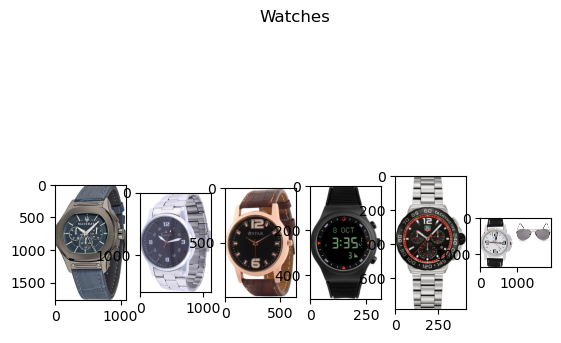

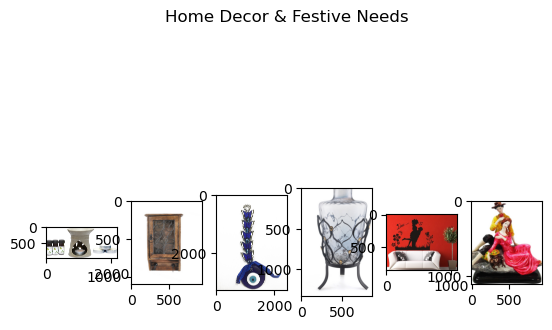

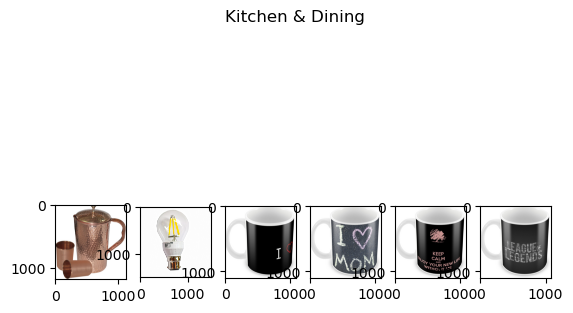

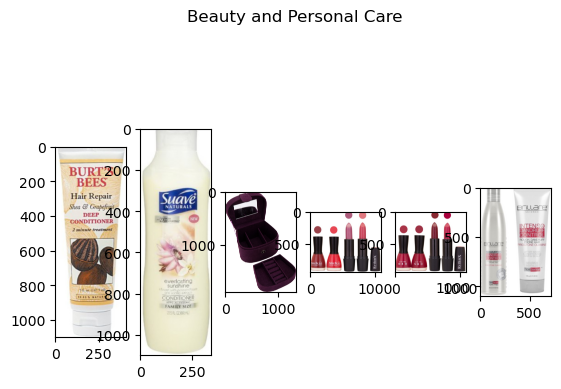

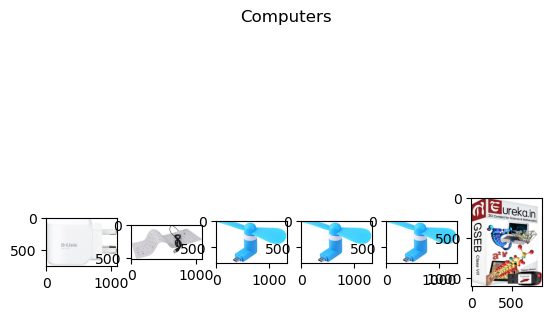

In [12]:
# Récupérer les noms de catégorie uniques dans le dataframe
categories = df['label_name'].unique()

# Boucle à travers ch£aque catégorie
for cat in categories:
    # Sélectionner les premières photos de cette catégorie
    photos = df.loc[df['label_name'] == cat]['image_path'][:6].tolist()
    
    # Créer un sous-plot de colonnes pour afficher les photos
    fig, axs = plt.subplots(1, 6)
    
    # Boucle à travers chaque photo et l'afficher dans le subplot correspondant
    for i, photo in enumerate(photos):
        img = plt.imread('./Images/'+photo)
        axs[i].imshow(img)
    
    # Définir le titre global du subplot
    fig.suptitle(cat)
    
    # Afficher le subplot
    plt.show()

## Détermination et affichage des descripteurs SURF

In [16]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

[ WARN:0@303.310] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [15]:
surf = cv2.xfeatures2d.SURF_create(400)
image = cv2.imread(path+df.image_path[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = surf.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print(des)

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


# Pré-traitement des images via SURF

In [14]:
# identification of key points and associated descriptors
orb_keypoints = []
temps1=time.time()
surf = cv2.xfeatures2d.SURF_create()

for image_num in range(len(list_photos)):
    if image_num%100 == 0 : print(image_num)  
    image = cv2.imread(path+list_photos[image_num],0) 
    image = cv2.GaussianBlur(image, (5, 5), 0)
    equalized = cv2.equalizeHist(image)  
    kp, des = orb.detectAndCompute(equalized, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints, dtype=object)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
Nombre de descripteurs :  (517864, 32)
temps de traitement SIFT descriptor :            45.43 secondes


## Création des clusters de descripteurs

In [15]:
a = pd.DataFrame(orb_keypoints_all)
a

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,41,178,245,93,126,31,233,123,119,232,...,239,157,30,110,117,172,255,172,112,253
1,203,118,107,65,106,252,189,23,236,79,...,165,66,70,61,58,192,14,132,129,249
2,124,165,125,96,168,105,81,59,227,181,...,234,4,219,217,69,125,226,128,198,34
3,77,97,53,36,13,15,71,184,232,164,...,249,8,229,184,69,60,66,50,67,98
4,3,157,61,137,246,231,179,231,94,77,...,113,255,45,20,190,194,148,72,181,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517859,194,32,170,8,89,245,89,64,167,7,...,146,210,87,125,146,63,50,37,124,70
517860,126,149,123,254,253,253,87,249,151,196,...,250,255,123,255,133,63,179,239,246,242
517861,41,221,119,223,244,223,111,253,125,104,...,121,255,119,255,231,192,79,186,224,253
517862,199,26,175,150,172,164,169,0,236,218,...,183,224,29,58,250,130,140,97,113,117


In [16]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  720
Création de 720 clusters de descripteurs ...


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             5.69 secondes


## Création des features des images

In [17]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.87 secondes


## Réductions de dimension

In [18]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 720)
Dimensions dataset après réduction PCA :  (1050, 569)


In [19]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["label_name"]
print(df_tsne.shape)

(1050, 3)


In [20]:
df_tsne.groupby("class").count()

,tsne1,tsne2
class,,
Baby Care,150,150
Beauty and Personal Care,150,150
Computers,150,150
Home Decor & Festive Needs,150,150
Home Furnishing,150,150
Kitchen & Dining,150,150
Watches,150,150


## Analyse visuelle : affichage T-SNE selon catégories d'images

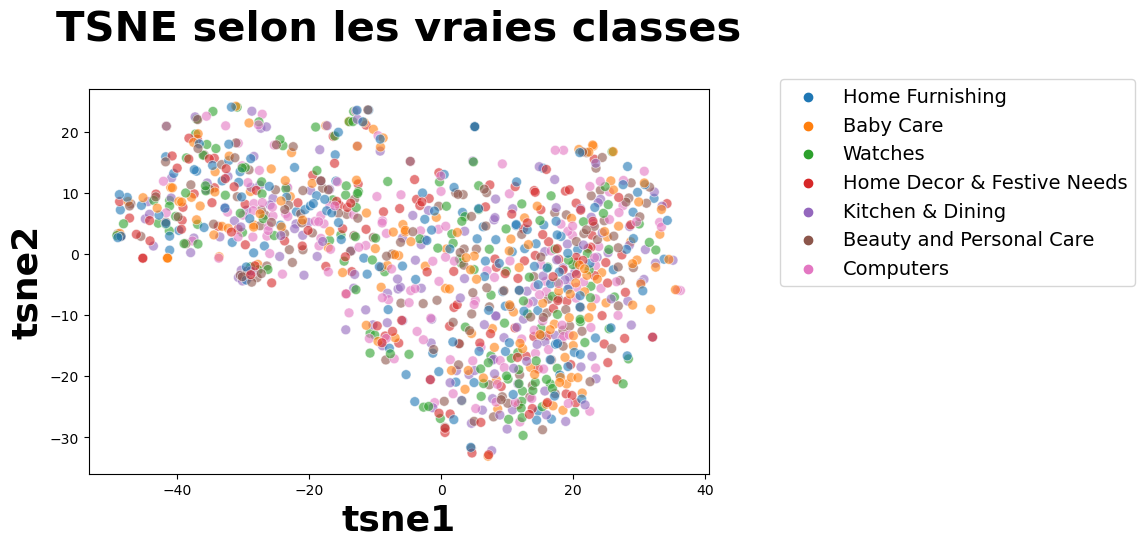

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.1, 1.05)) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [22]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df_tsne

,tsne1,tsne2,class,cluster
0,32.288391,9.127267,Home Furnishing,0
1,-9.095716,-5.445163,Baby Care,6
2,7.775954,-12.218018,Baby Care,2
3,-37.084064,13.579617,Home Furnishing,1
4,23.406538,-13.752060,Home Furnishing,5
...,...,...,...,...
1045,-34.461769,3.129893,Baby Care,1
1046,8.079275,-15.295921,Baby Care,2
1047,-12.832594,12.098344,Baby Care,3
1048,-24.280132,8.690912,Baby Care,3


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

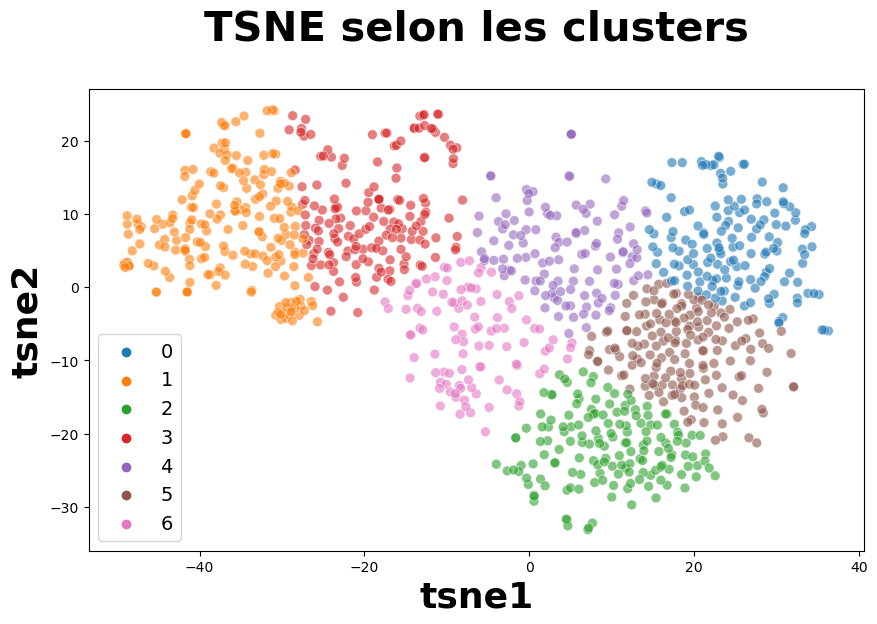

ARI :  0.0005947026352308938


In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes

In [25]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    147
1    199
2    155
3    163
4    120
5    165
6    101
Name: class, dtype: int64

In [26]:
labels_np = labels.to_numpy(copy=True)
labels_np

array([4, 0, 0, ..., 0, 0, 0])

In [27]:
clusters = cls.labels_
clusters.shape

(1050,)

In [28]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[23 29 23 21 15 25 14]
 [24 31 18 25 17 22 13]
 [23 17 17 31 14 26 22]
 [21 34 22 16 19 24 14]
 [21 33 18 21 25 23  9]
 [22 23 26 25 12 23 19]
 [13 32 31 24 18 22 10]]


In [33]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [0, 6, 2, 1, 5, 3, 4]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels_np, clusters)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0, 6, 2, 1, 5, 3, 4]
[[23 21 23 25 14 15 29]
 [24 25 18 22 13 17 31]
 [23 31 17 26 22 14 17]
 [21 16 22 24 14 19 34]
 [21 21 18 23  9 25 33]
 [22 25 26 23 19 12 23]
 [13 24 31 22 10 18 32]]
              precision    recall  f1-score   support

           0       0.16      0.15      0.15       150
           1       0.15      0.17      0.16       150
           2       0.11      0.11      0.11       150
           3       0.15      0.16      0.15       150
           4       0.09      0.06      0.07       150
           5       0.10      0.08      0.09       150
           6       0.16      0.21      0.18       150

    accuracy                           0.14      1050
   macro avg       0.13      0.14      0.13      1050
weighted avg       0.13      0.14      0.13      1050



In [34]:
df_tsne['class'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [35]:
df_tsne['cluster'].unique()

array([0, 6, 2, 1, 5, 3, 4], dtype=int32)

<AxesSubplot: >

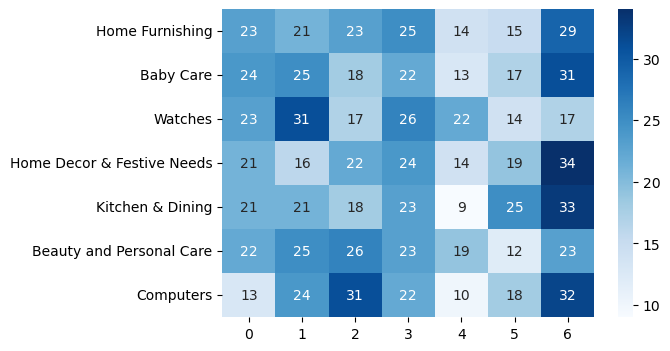

In [38]:
list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers']
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")